In [ ]:
'''
Author - Aparna Gupta
'''

In [115]:
import numpy as np
from qiskit import QuantumCircuit, assemble, Aer, execute
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_bloch_vector, plot_state_qsphere, plot_state_city, plot_gate_map, plot_error_map, array_to_latex
from qiskit.circuit import Gate
from math import pi
sim = Aer.get_backend('qasm_simulator')
backend = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit

In [107]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

def custom_circuit(n_qubits):
    """
    Generate an n-qubit quantum circuit based on user input.

    Parameters:
    - n_qubits (int): Number of qubits in the circuit.

    Returns:
    - QuantumCircuit: The generated quantum circuit.
    """

    # Create a quantum circuit with n_qubits
    custom_circuit = QuantumCircuit(n_qubits)

    # User input for qubit initialization
    for qubit in range(n_qubits):
        user_input_state = input(f"Enter an array for the state of qubit {qubit} (e.g., [a, b]): ")
        state = [float(x) for x in user_input_state.replace('[','').replace(']','').split(',')]
        custom_circuit.initialize(state, qubit)

    # User input for gate applications
    while True:
        gate_input = input("Enter gate and qubit (e.g., 'h 0' for Hadamard on qubit 0, 'cx 0 1' for CNOT between qubits 0 and 1): ")
        if gate_input.lower() == 'done':
            break

        # Parse user input for gate and qubits
        gate, *qubits = gate_input.split()
        qubits = list(map(int, qubits))

        # Apply the specified gate to the specified qubits
        if gate == 'h':
            custom_circuit.h(qubits[0])
        elif gate == 'rx':
            custom_circuit.rx(qubits[1], qubits[0])
        elif gate == 'ry':
            custom_circuit.ry(qubits[1], qubits[0])
        elif gate == 's':
            custom_circuit.s(qubits[0])
        elif gate == 't':
            custom_circuit.t(qubits[0])
        elif gate == 'x':
            custom_circuit.x(qubits[0])
        elif gate == 'y':
            custom_circuit.y(qubits[0])
        elif gate == 'z':
            custom_circuit.z(qubits[0])
        elif gate == 'cz':
            custom_circuit.cz(qubits[0], qubits[1])
        elif gate == 'rz':
            custom_circuit.rz(qubits[1], qubits[0])
        elif gate == 'cx':
            custom_circuit.cx(qubits[0], qubits[1])
        elif gate == 'cy':
            custom_circuit.cy(qubits[0], qubits[1])

    return custom_circuit



def get_statevector(qc):
    # Tell simulator to save statevector
    qc.save_statevector() 
    
    # Create a Qobj from the circuit for the simulator to run
    qobj = assemble(qc)
    
    # Do the simulation and return the result
    result = sim.run(qobj).result()
    
    out_state = result.get_statevector()
    
    return out_state
from qiskit import Aer, execute

def get_counts_from_statevector(custom_circuit, shots=1024):
    """
    Get counts from a custom quantum circuit by retrieving the state vector.

    Parameters:
    - custom_circuit (QuantumCircuit): The custom quantum circuit to be executed.
    - shots (int): Number of shots for the simulator (default is 1024).

    Returns:
    - dict: Counts dictionary obtained from the simulation results.
    """

    # Get the state vector from the quantum circuit
    s = get_statevector(custom_circuit)
    
    # Execute the circuit on a simulator using the obtained state vector
    result = execute(custom_circuit, sim, shots=shots, initial_state=s).result()
    
    # Get counts from the simulation results
    counts = result.get_counts(custom_circuit)

    return counts



# Example usage:
n_qubits = int(input("Enter the number of qubits in the circuit: "))
custom_circuit = custom_circuit(n_qubits)



Enter the number of qubits in the circuit:  1
Enter an array for the state of qubit 0 (e.g., [a, b]):  [1,0]
Enter gate and qubit (e.g., 'h 0' for Hadamard on qubit 0, 'cx 0 1' for CNOT between qubits 0 and 1):  h 0
Enter gate and qubit (e.g., 'h 0' for Hadamard on qubit 0, 'cx 0 1' for CNOT between qubits 0 and 1):  done


/home/bf2e1754-fb50-45ce-bc5c-f2cdb216a158/.local/lib/python3.9/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


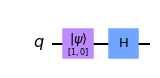

In [121]:
# Qiskit visualization
custom_circuit.draw('mpl')

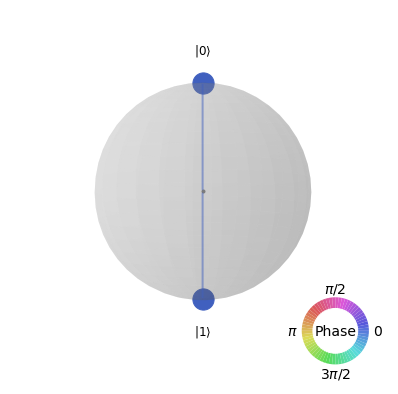

In [123]:
# Q-sphere visualization
statevector_backend = Aer.get_backend('statevector_simulator')
statevector = execute(custom_circuit, statevector_backend).result().get_statevector()
plot_state_qsphere(statevector)

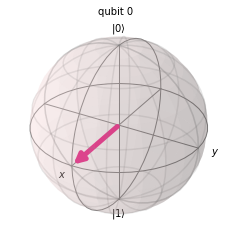

In [125]:
# Bloch vector visualization
bloch_backend = Aer.get_backend('statevector_simulator')
statevector = execute(custom_circuit, bloch_backend).result().get_statevector()
plot_bloch_multivector(statevector)

Enter the number of shots for simulation:  1024


/tmp/ipykernel_800/425551125.py:75: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = sim.run(qobj).result()


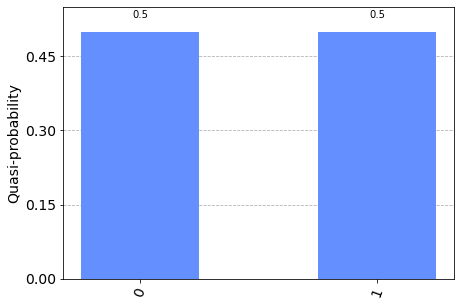

In [127]:
# Histogram of measurement results
shots = int(input("Enter the number of shots for simulation: "))
counts = get_counts_from_statevector(custom_circuit, shots)
plot_histogram(counts)

Counts for Execution 1: {'0': 0.5, '1': 0.5}
Counts for Execution 2: {'0': 0.5, '1': 0.5}
Counts for Execution 3: {'0': 0.5, '1': 0.5}
Counts for Execution 4: {'0': 0.5, '1': 0.5}
Counts for Execution 5: {'0': 0.5, '1': 0.5}


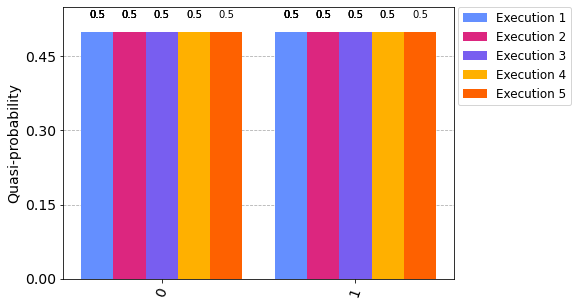

In [133]:
def execute_and_plot_counts(q_circuit, shots=1024, num_executions=2):
    """
    Execute a quantum circuit multiple times and plot the counts for each execution.

    Parameters:
    - q_circuit (QuantumCircuit): The quantum circuit to be executed.
    - shots (int): Number of shots for each execution (default is 1024).
    - num_executions (int): Number of executions (default is 2).
    """

    sim = Aer.get_backend('qasm_simulator')

    # Perform multiple executions and collect counts
    all_counts = []
    for _ in range(num_executions):
        result = execute(q_circuit, sim, shots=shots).result()
        counts = result.get_counts()
        all_counts.append(counts)

    # Print the counts for each execution
    for i, counts in enumerate(all_counts):
        print(f"Counts for Execution {i + 1}: {counts}")

    # Plot histogram with legend
    legend = [f'Execution {i + 1}' for i in range(num_executions)]
    return plot_histogram(all_counts, legend=legend)


# Execute and plot counts for multiple executions
execute_and_plot_counts(custom_circuit, shots = 2000, num_executions = 5)